## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. 

They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


##### importing libraries 

In [18]:
# pandas for data manipulation
import pandas as pd
# numpy for numerical and statistics
import numpy as np
# matplotlib for visiulization
import matplotlib.pyplot as plt
# seaborn for statical visiulization
import seaborn as sns
# regex for extracting element from a particular string
import re
# magical function from draw chart in that file only
%matplotlib inline

Data Gethering

Dataset is given in the CSV format

In [19]:
# load dataset
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/CarPrice_Assignment_Assignment_3.csv")
df.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [20]:
df.shape

(205, 26)

Dataset have 205 rows and 26 cloumns

Data Exploration

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
df.head(3).T

,0,1,2
car_ID,1,2,3
symboling,3,3,1
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio
fueltype,gas,gas,gas
aspiration,std,std,std
doornumber,two,two,two
carbody,convertible,convertible,hatchback
drivewheel,rwd,rwd,rwd
enginelocation,front,front,front
wheelbase,88.6,88.6,94.5


In [23]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No null value in dataset

In [24]:
df.duplicated().sum()

0

No duplicated

Understanding The attributes

#### Categorical attribute

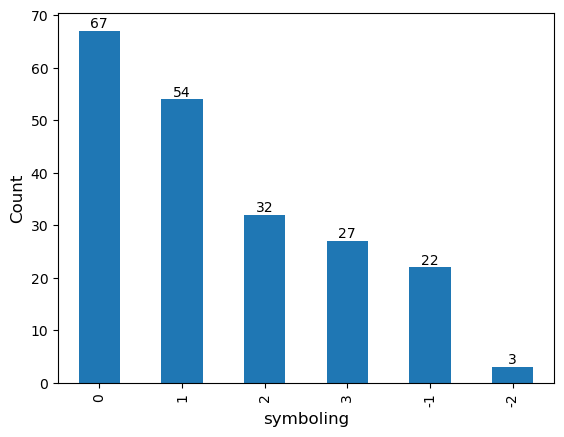

In [25]:
# symboling
# Its assigned insurance risk rating,
# Negative Values (e.g., -3 to 0): Vehicles with negative symbol values are often considered safer
# and less risky to insure. These vehicles usually have more safety features, lower likelihood of theft,
# and lower expected repair costs. As a result, they tend to have lower insurance premiums.

# Positive Values (e.g., 1 to 20): Vehicles with positive symbol values may be associated with higher 
# risk factors such as increased likelihood of theft, higher repair costs, or higher claims history. 
# These vehicles could have higher insurance premiums due to the perceived higher risk.

ax = df["symboling"].value_counts().plot(kind = "bar")
ax.bar_label(ax.containers[0])
plt.xlabel("symboling", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

As per plot we can see that car with symboling between 0-3 is more as compare to negative value means value is as ealier I say symboling refer to risk factor higher positive value higher risk
means we have higher risk car more as compared lower risk we will see further how car price depend on that

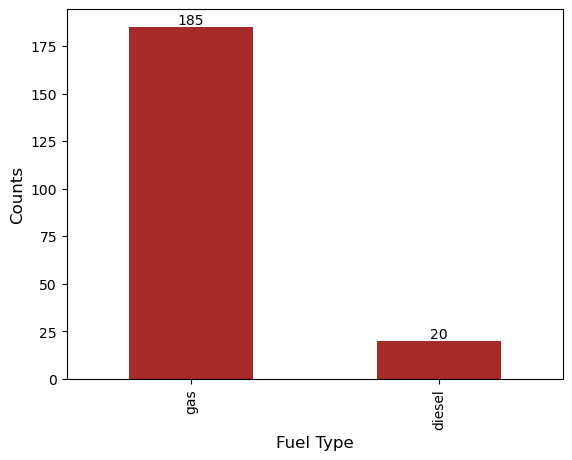

In [26]:
# Car fuel type i.e gas or diesel
# I hope we are familiar with from our chidhood there is two one is gas(petrol) and deisel
ax = df["fueltype"].value_counts().plot(kind = "bar", color = "brown")
ax.bar_label(ax.containers[0])
plt.xlabel("Fuel Type", fontsize = 12)
plt.ylabel("Counts", fontsize = 12)
plt.show()

As per plot we can say that fuel type gas is dominating on diesel reason is common as we have study in our physics--

Gasoline is a lighter and more volatile fuel compared to diesel. It is derived from crude oil through a refining process and contains hydrocarbons with relatively low boiling points while Diesel fuel is heavier and less volatile compared to gasoline. It also comes from crude oil, but it is processed differently to have a higher boiling point range.

There is more reason its ignition temperature and efficiency which make gasoline better as compared to petrol.

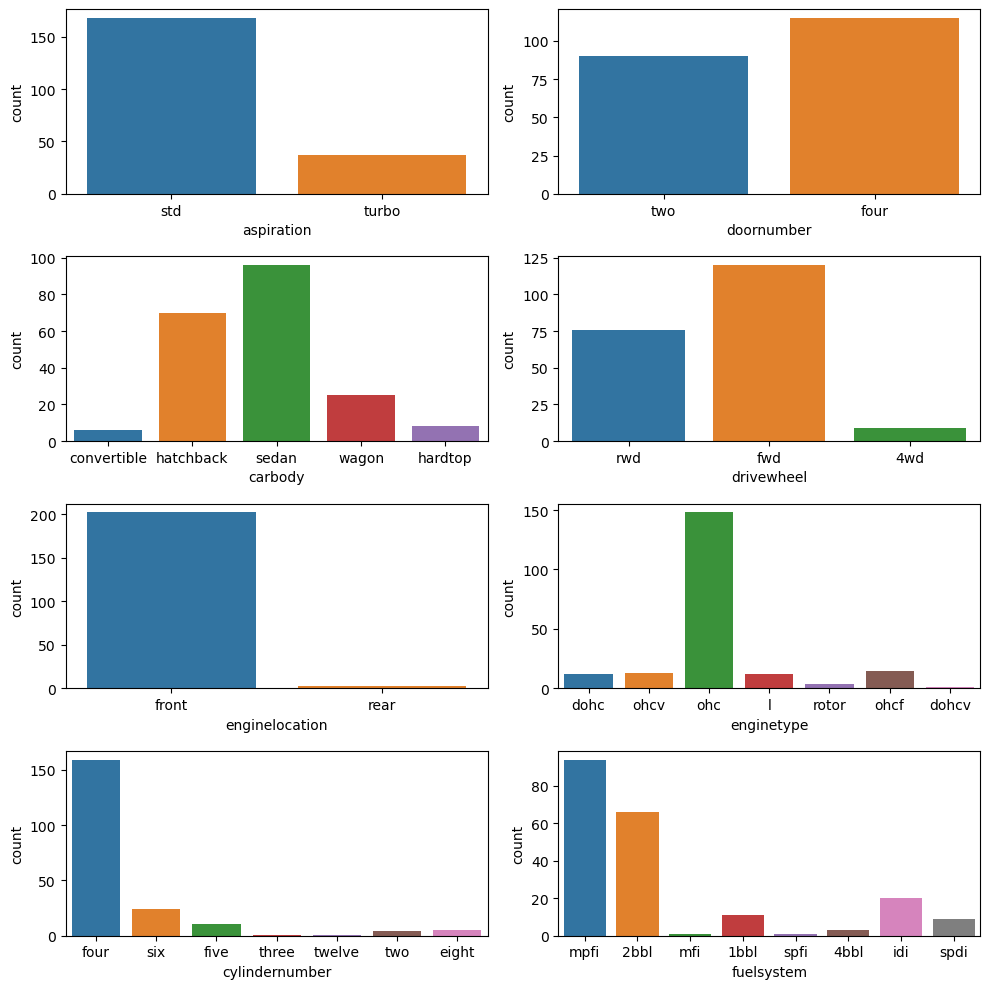

In [27]:
# "aspiration," which refers to the way air is delivered to the engine.
# turbo:Turbocharging, air enter through pressurised oxygen intake.
# std:air enter at standard atmospheric pressure

# types of wheels ,fwd:front wheel drive,rwd:"rear-wheel drive",4WD:four-wheel drive vehicle


# engine type---abbreviations used to describe different types of engine configurations ex-
# OHCF stands for Over Head Camshaft Four,DOHCF stands for Double Over Head Camshaft Four

# cylinder--number of cylinder in engine
# fuel system--fuel injection sysytem ex - mpfi - multipoint_point_fuel_enjiction system

fig, ax = plt.subplots(4,2,figsize = (10,10))
columns = df.select_dtypes("object").drop(["CarName","fueltype"],axis = 1).columns
n = 0
for i in range(4):
    for j in range(2):
        sns.countplot(x = df[columns[n]], ax = ax[i][j])
        n+=1
plt.tight_layout()

In above chart we can see that six different plot 

1) aspiration with std is more that turbo reason is simple turbo genrally is more costly that std it is mostly used in luxury car.

2) Door number 4 is more than 2 Now in present world most of the car have 4 door.

3) Car body sedan and hatchback are more as compared other car there is no specific reson everyone have their personal choices and affordability.

4) we driver wheel rwd and fwd is more and 4wd is less.

5) Now current scenario majority of car used front engine location 

5) 4 cylinder engine is genrally prefer because it is affordable.

6) most of the car have mpfi and 2bbl fuel system

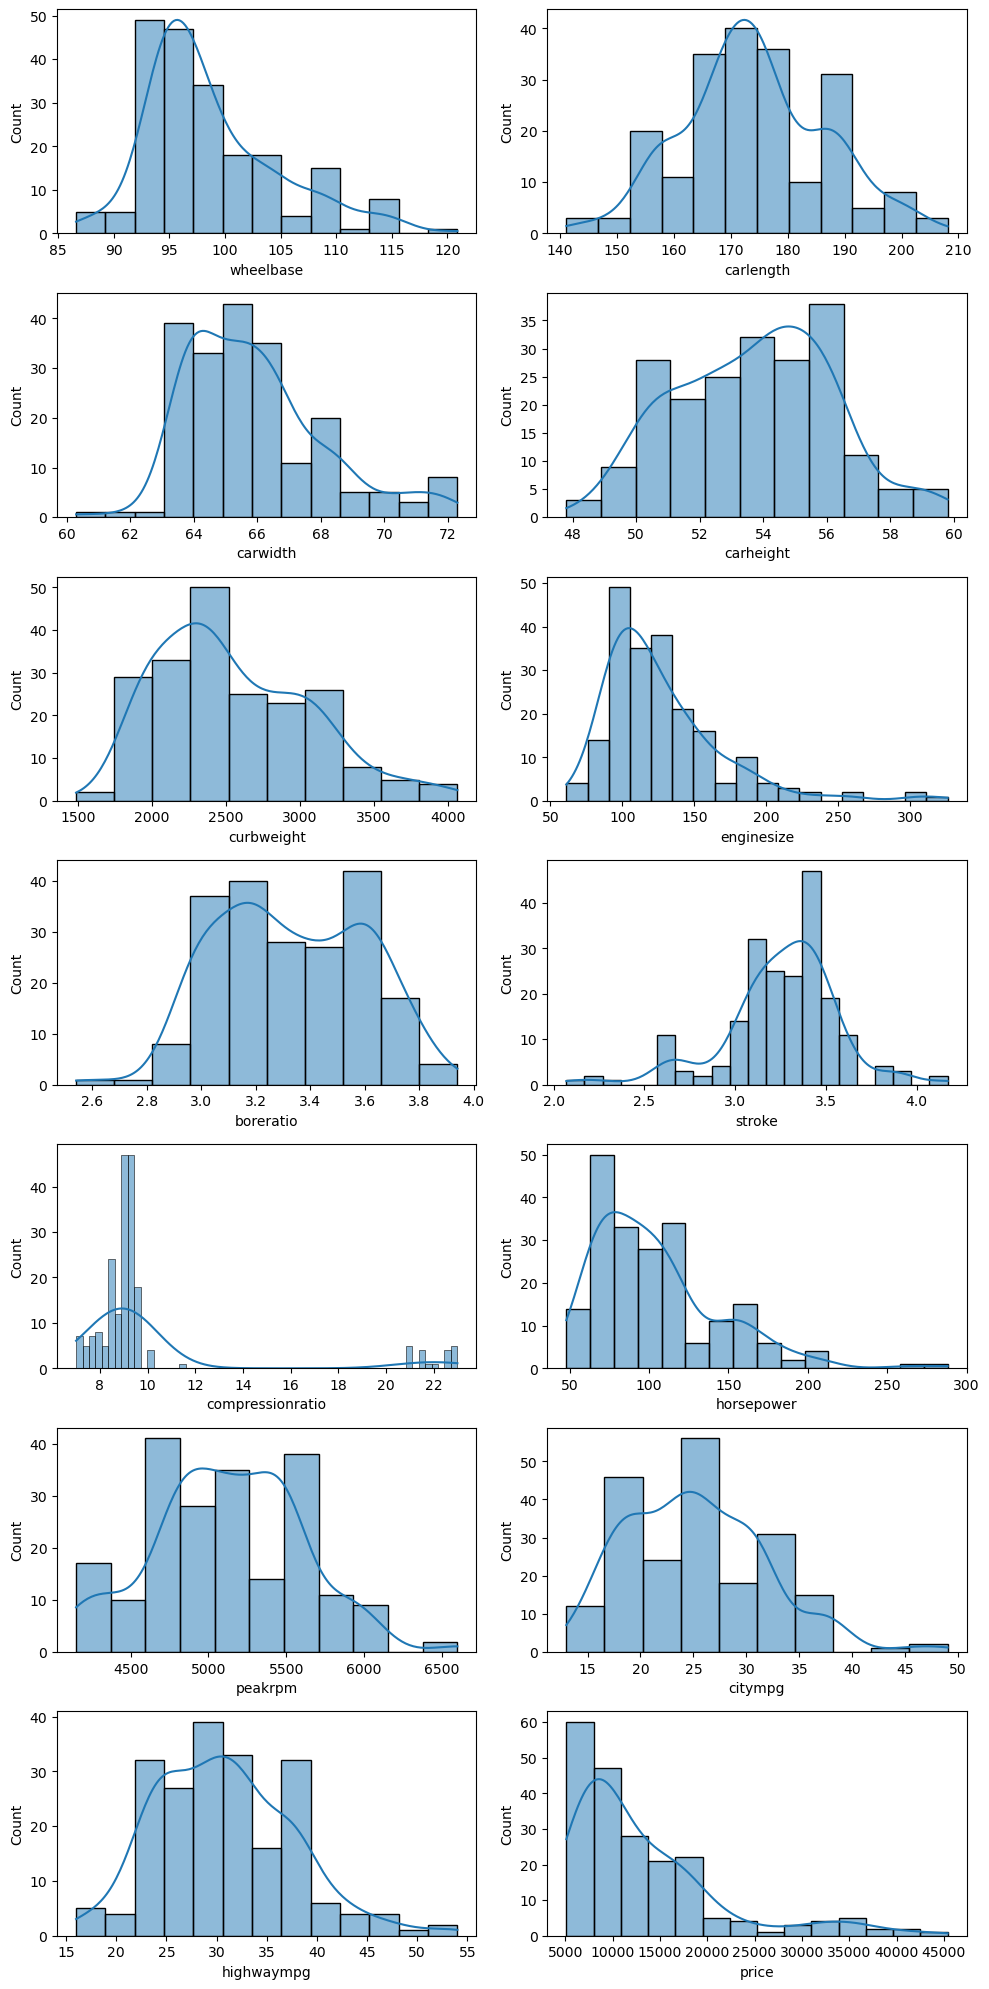

In [28]:
# wheelbase:The wheelbase is the distance between the centers of the front and rear wheels of a vehicle

# carlenght:Length of car

# carwidth:width of car

# carhieght:hight of car

# curbwieght:Curb weight is the total weight of a vehicle including all standard equipment

# engine size:Engine size refers to the total volume of the combustion chambers inside an internal 
# combustion engine. It is usually measured in either cubic centimeters (cc) or liters (L).

#bore ratio:It is the ratio of dia of cylinder bore and stroke lenght

# stroke:stroke legth 

# compression ratio:Compression ratio is a measure of the difference between the volume of an engine
# cylinder when the piston is at the bottom of its stroke (known as the "displacement volume") and the
# volume of the same cylinder when the piston is at the top of its stroke (known as the "clearance
# volume"). The compression ratio is calculated by dividing the displacement volume by the clearance 
# volume.

# horse power :power output of the engine at a given RPM. The higher the horsepower rating, the more
# power the engine can produce and the faster the vehicle can go.

# peak rpm: refers to the maximum rotational speed that an engine can achieve, which typically occurs
# when the engine is producing its maximum power output.

# citympg: City MPG (Miles Per Gallon) is a measure of a vehicle's fuel efficiency in miles traveled 
# per gallon of fuel consumed while driving in typical city conditions. City driving is characterized
# by frequent stops and starts, lower speeds, and higher levels of traffic compared to highway driving.


# highwaympg: Highway MPG (Miles Per Gallon) is a measure of a vehicle's fuel efficiency in miles 
# traveled per gallon of fuel consumed while driving on a typical highway or freeway. Highway driving 
# is characterized by higher speeds, smoother road surfaces, and fewer stops and starts compared to
# city driving.

# price:price of a car

numeric = ["int32", "int64", "float32","float64"]
columns = df.select_dtypes(include = numeric).drop(["car_ID", "symboling"],axis = 1).columns
fig, ax = plt.subplots(7,2,figsize = (10,20))
n = 0
for i in range(7):
    for j in range(2):
        sns.histplot(x = df[columns[n]], ax = ax[i][j], kde = True)
        n+=1
plt.tight_layout()



histogram represent frequency of data points (distribution)
line is kernel density estimation: It is a statistical technique that estimates the distribution 
#of data, which can be used to gain insights into the population from which the sample was drawn.

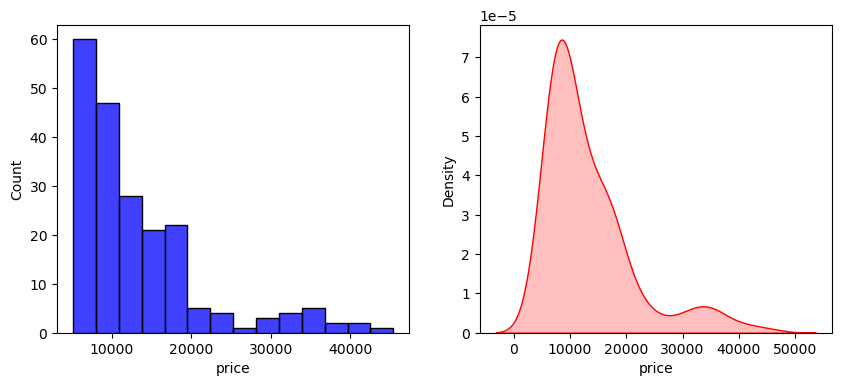

In [29]:
# let see seprate distribution of our tarfget varieble (Price)
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.histplot(x = df["price"], ax = ax[0], color = "blue")
sns.kdeplot(x = df["price"], ax = ax[1], fill = True, color = "red")
plt.show()

The distribution of the price attribute is found to be right-skewed, with the majority of the cars falling between 7500 and 20000, which accounts for approximately 70% of the data. The remaining 30% of the data is distributed up to 50000.

On examining the distribution plot, it is observed that there are two normal distributions. The first normal distribution is observed up to 28000, which indicates the presence of a set of cars with a lower price range. The second normal distribution appears after 28000, which indicates the presence of a set of cars with a higher price range, possibly including luxury cars.

In summary, the distribution of the price attribute suggests that there are two sets of cars in the dataset, one with a lower price range and the other with a higher price range, possibly including luxury cars.

In [30]:
# descriptive statics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


Discriptive statitics represnt summary of dataset 

we have count, mean, 50% (median)

Check mean and 50% if they are almost equal and check (50%-min) and (max-50%) if they are equal means that featuered id normally distributed less posibility of outliers if both are different means data is skewed ther is some outliers.

Like we can see in price min between (5118.0, 10295.00) we have 50% of the data remaining 50% is between (16503.00, 45400) we can see that there is some outliers

### Till know we are aware with dataset and thier distribution
### Now its time to see how each attribute impact our target variable(Price).

Bivarient Analysis

In [31]:
# make a copy of original data set 
car_df = df.copy()

First I am going to see how a categorical varieble impact our price

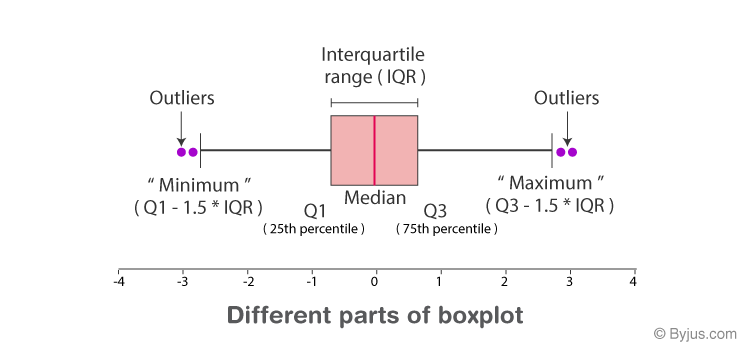

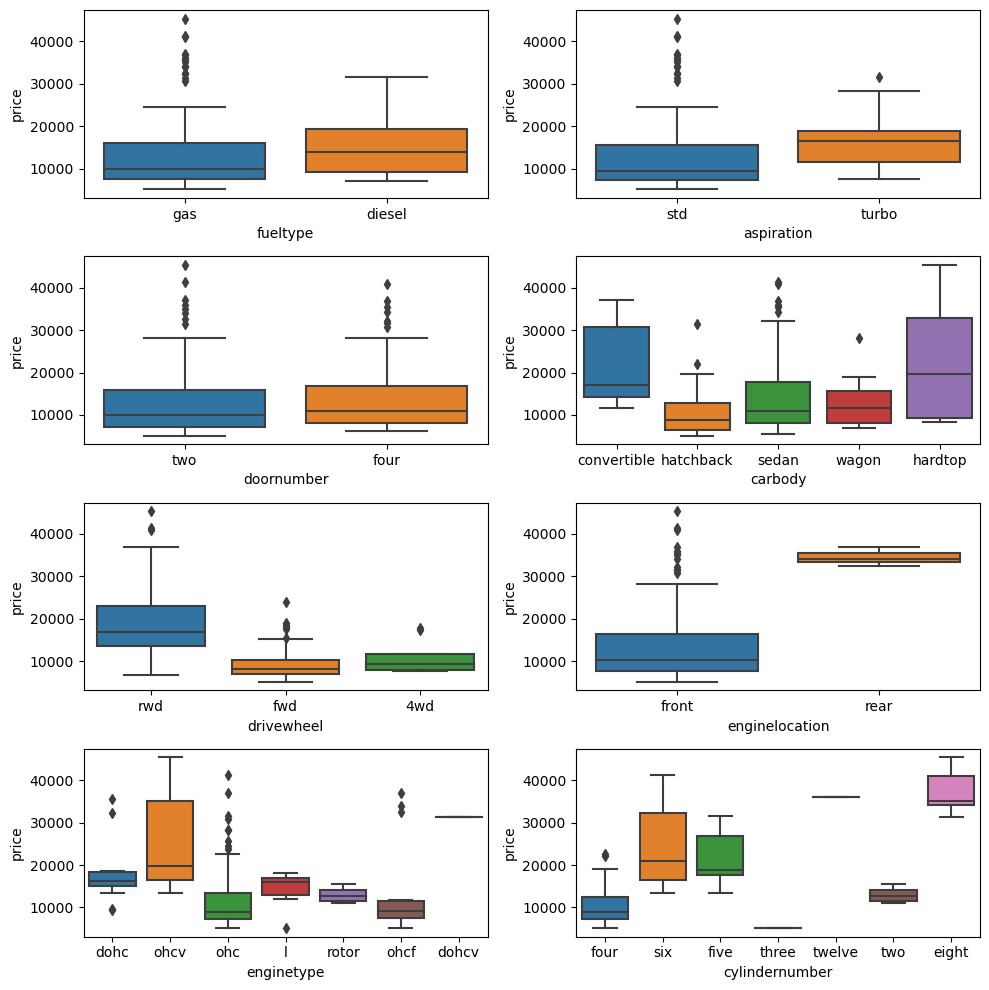

In [32]:
# boxplot
columns = df.select_dtypes("object").drop("CarName",axis = 1).columns
fig, ax = plt.subplots(4,2,figsize = (10,10))
n = 0
for i in range(4):
    for j in range(2):
        sns.boxplot(x = df[columns[n]], y = df["price"], ax = ax[i][j])
        n+=1
plt.tight_layout()

In analyzing charts for various categories, it is evident that median price, minimum price, and maximum price differ significantly. These variables are likely to have a significant impact on Target variable. However, it is worth noting that door number does not exhibit such variations in median, minimum, and maximum values. Therefore, door number is not expected to significantly affect our model.

aspiration and fuel type depends at moderate level.

in engine location most of the datapoint for only front very less for rear if we take this into our analysis may be model become bias.




Lets understand something about violin plot it will be used fruther it is combination baxplot and kde(kernel density estimation plot) the thichness (spreadness) tells density of sample higher the thickness and higher the number of sample within that range vice versa.

the black you seen that is box plot.

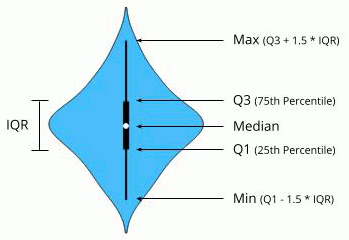

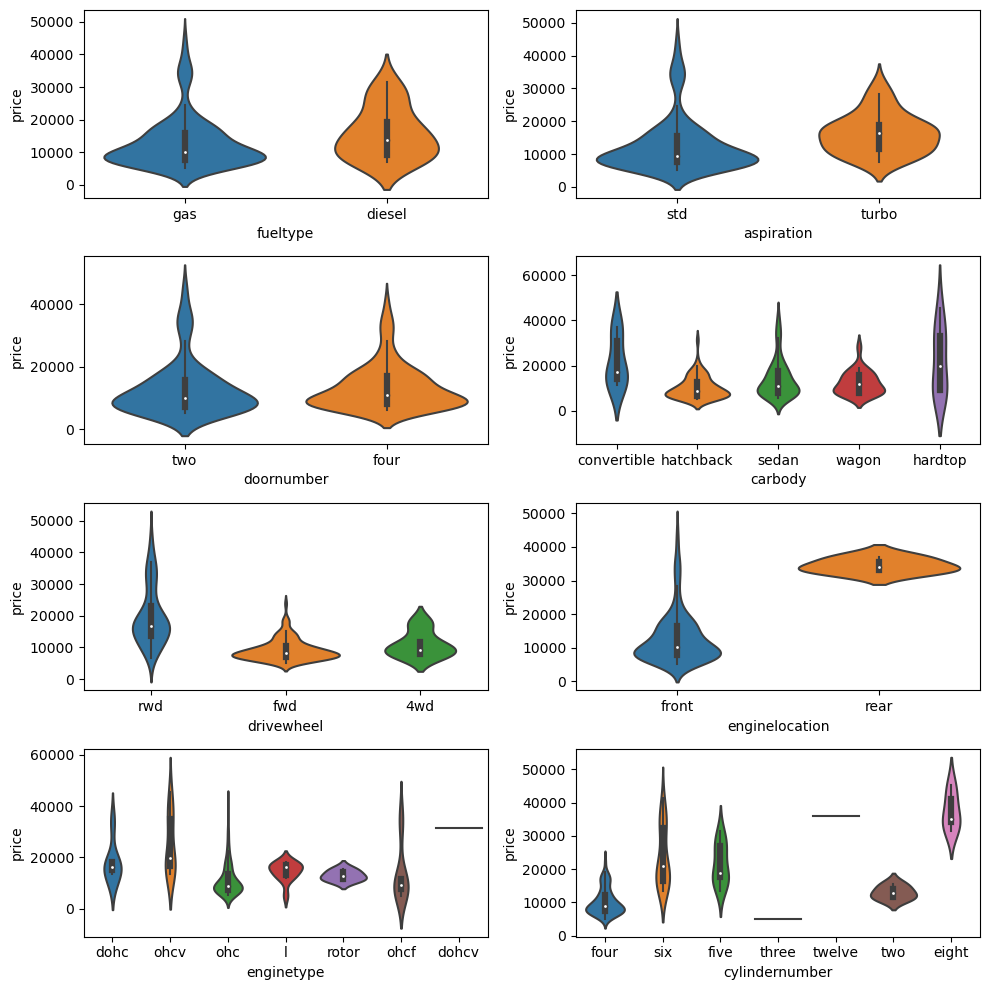

In [33]:
# violin plot
columns = df.select_dtypes("object").drop("CarName",axis = 1).columns
fig, ax = plt.subplots(4,2,figsize = (10,10))
n = 0
for i in range(4):
    for j in range(2):
        sns.violinplot(x = df[columns[n]], y = df["price"], ax = ax[i][j])
        n+=1
plt.tight_layout()

Same thing in violin plot also

Let's check how numerical or Countinous variable impact or Target feature

Before moving forward let's understand something about scatter plot and corelation


scaater plot--A scatter plot is a graphical representation used to display the relationship between two sets of data points. It's a way to visually explore and understand how two variables might be related to each other. Scatter plots consist of points on a grid, where each point represents a pair of values from the two variables being compared.


Corelation--Correlation refers to a statistical measure that quantifies the strength and direction of a relationship between two or more variables. In other words, it helps you understand how changes in one variable might be associated with changes in another variable. Correlation does not imply causation, meaning that even if two variables are correlated, it doesn't necessarily mean that changes in one variable cause changes in the other.

There are two main types of correlation:

Positive Correlation: When two variables have a positive correlation, it means that as one variable increases, the other variable also tends to increase. Conversely, as one variable decreases, the other variable tends to decrease.

Negative Correlation: In the case of negative correlation, as one variable increases, the other variable tends to decrease, and vice versa. When one variable decreases, the other tends to increase.

Correlation is often measured using correlation coefficients. The most common correlation coefficient is the Pearson correlation coefficient (also known as Pearson's r), which ranges from -1 to 1:



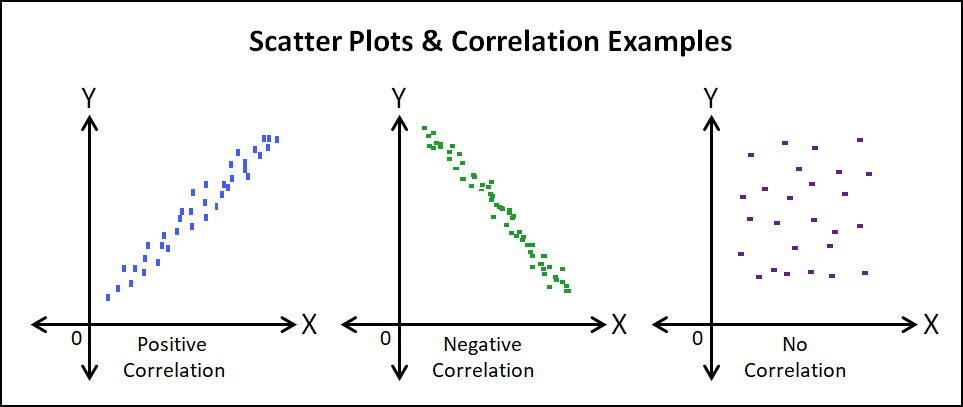





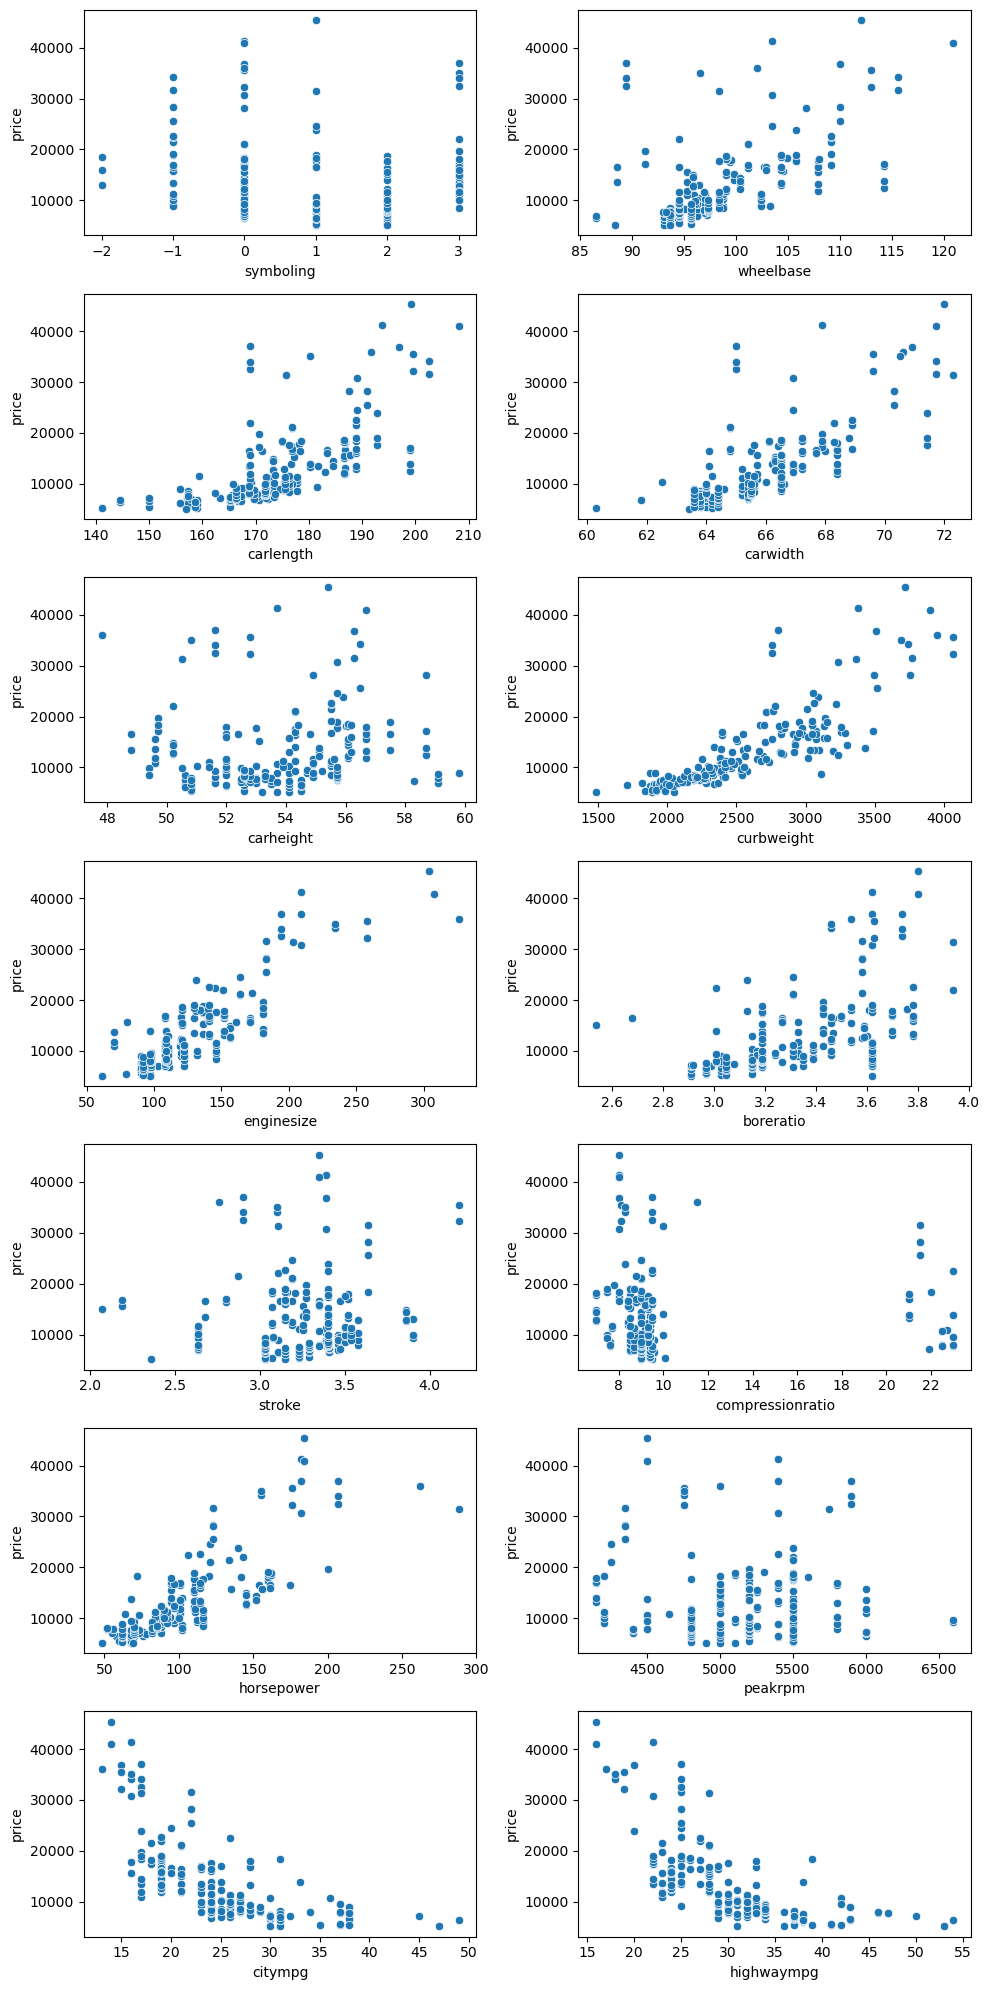

In [34]:
# scatter plot
columns = df.select_dtypes(include = numeric).drop(["price","car_ID"], axis = 1).columns
fig, ax = plt.subplots(7,2,figsize = (10,20))
n = 0
for i in range(7):
    for j in range(2):
        sns.scatterplot(x = df[columns[n]], y = df["price"], ax = ax[i][j])
        n+=1
plt.tight_layout()

In above charts our target feature highly depends upon 
#### Horsepoer, citympg, highwaympg, boreratio, enginesize, curbweight, carwidth, carlength, wheel_base.

less depend on
#### peakrpm, Compression ratio, stroke, carhight, symboling 

## Feature Engineering

### Feature Selection

In [35]:
# First drop categorical feature which less impact on our model we already see in our EDA part
# doornumber, engine_location
df = df.drop(["doornumber","enginelocation"], axis = 1)

In [36]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [37]:
# drop car_id, carname it is not a feature of car
df = df.drop(["car_ID", "CarName"], axis = 1)
df

,symboling,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,sedan,rwd,109.1,188.8,68.9,55.5,2952,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,sedan,rwd,109.1,188.8,68.8,55.5,3049,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,sedan,rwd,109.1,188.8,68.9,55.5,3012,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,sedan,rwd,109.1,188.8,68.9,55.5,3217,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Corelation for feature selection Numerical:Numerical

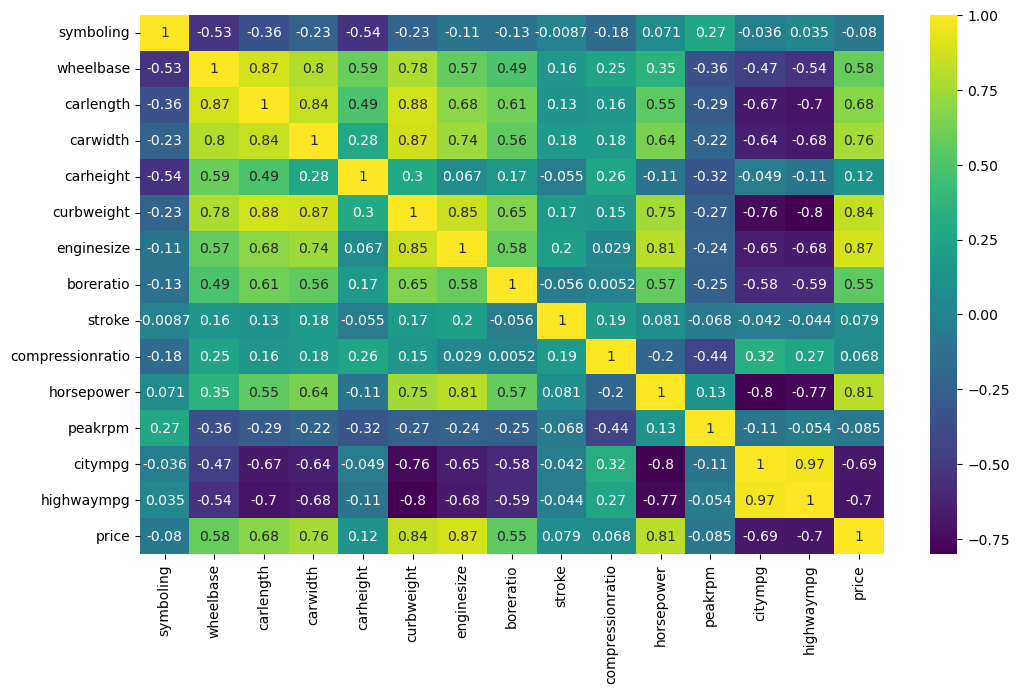

In [38]:
cor_mat = df.corr()
plt.figure(figsize = (12,7))
sns.heatmap(df.corr() , annot = True,cmap = "viridis")
plt.show()

In [39]:
# we want such feature which have atleast 0.3 absolute corelation value 

In [40]:
# make a function which give less_corelated feature 
def less_correl(df,theresold):
    lis = []
    corr_mat = df.corr()
    for i in corr_mat.columns:
        if abs(corr_mat.loc[i,"price"])<theresold:
            lis.append(i)
    return lis

In [44]:
# it is same feature we see in scatter plot which are less informative
less_correl(df,0.3)

['symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']

There is something issue in data or may be there are non linear relationship because above feature like stroke and compressionration and peakrpm directly depend on efficiency of engine.

feature like symboling and carheight not affect that much price of we can remove that

In [45]:
# lets drop that
df = df.drop(["symboling", "carheight"], axis = 1)

###### We start with these columns
##### 'car_ID',    'symboling',    'CarName',   'fueltype',     'aspiration',    'doornumber',    'carbody',    'drivewheel', 'enginelocation',   'wheelbase',   'carlength',   'carwidth',    'carheight',    'curbweight',    'enginetype',   'cylindernumber', 'enginesize',   'fuelsystem',    'boreratio',    'stroke',  'compressionratio',   'horsepower',   'peakrpm',   'citympg', 'highwaympg',  
###### Remove some columns which are less effective according to data like
##### 'car_ID',  'doornumber'', 'enginelocation',    'symboling', 'carheight'
 
###### Selected columns 
##### 'fueltype',  'aspiration',    'carbody',   'drivewheel',   'wheelbase',   'carlength',   'carwidth',   'curbweight',   'enginetype', 'cylindernumber',  'enginesize',   'fuelsystem',   'boreratio' ,   'horsepower',   'citympg',  'highwaympg', 'stroke', 'compressionratio', 'peakrpm'

In [147]:
df.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

### Data Prepration

In [47]:
df.dtypes
# every features in proper datatypes

fueltype             object
aspiration           object
carbody              object
drivewheel           object
wheelbase           float64
carlength           float64
carwidth            float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [48]:
df.isnull().sum()
# zero null

fueltype            0
aspiration          0
carbody             0
drivewheel          0
wheelbase           0
carlength           0
carwidth            0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [49]:
df["cylindernumber"] = df["cylindernumber"].replace({'four':4, 'six':6, 'five':5, 'three':3,
                                                     'twelve':12, 'two':2, 'eight':8})

In [50]:
df["cylindernumber"] = df["cylindernumber"].astype("int64")

# NOTE--I have not remove the ouliers because dataset is very small (only 205 records) if the number of record sufficient then outier removal is nececcary.

### Encoding
#### All categorical variable are Nominal we have to do One Hot Enconding

In [51]:
for i in df.select_dtypes("object").columns:
    df = pd.get_dummies(df, columns = [i], drop_first = True)


In [52]:
# Take Target variable in Y and all independent varaible in X
Y = df["price"].values
X = df.drop("price", axis = 1)

In [53]:
# Split data 80% for training purpose and 20% of testing
# from sklern import train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

Scaling

the data is normally distributed and/or the algorithm being used assumes a normal distribution, then StandardScaler is appropriate

In [54]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# scale X_train data
X_train = sc.fit_transform(X_train)
# scale X_test data here we are only use transform because we use mean and std of x_train
X_test  = sc.transform(X_test)
X_train

array([[ 1.03708546,  0.07244984,  0.08381686, ..., -0.95235327,
        -0.19487094, -0.07832604],
       [ 1.54123134,  1.04391556,  1.17026768, ...,  1.05003052,
        -0.19487094, -0.07832604],
       [-0.50896191, -0.36761583, -1.09710795, ..., -0.95235327,
        -0.19487094, -0.07832604],
       ...,
       [-0.71062026, -0.73295337, -1.00263396, ..., -0.95235327,
        -0.19487094, -0.07832604],
       [ 0.70098821,  0.77821554,  0.83960873, ...,  1.05003052,
        -0.19487094, -0.07832604],
       [ 0.28086664,  0.86954992,  0.27276483, ...,  1.05003052,
        -0.19487094, -0.07832604]])

Linear Regression

In [55]:
# from sklearn.linearmodel import LinearRegression 
from sklearn.linear_model import LinearRegression
# make a instances/objeact with name le 
le = LinearRegression()
# fit our X_train , Y_train
le.fit(X_train, Y_train)

LinearRegression()

In [56]:
# print intercept calculate by linear regression
print(f"The intercept is {le.intercept_}")
print()
# print coeffient of each variable which is calculated by linear regression
for idx, col_name in enumerate(X.columns):
    print(f"The coefficient of {col_name} is: {le.coef_[idx]}")    
# if you are change our input variable by 1 unit the target going to increased by
#target * coefficient + intercept

The intercept is 13223.414634146342

The coefficient of wheelbase is: 850.3951464444459
The coefficient of carlength is: -577.1390448704807
The coefficient of carwidth is: 1184.2857700906316
The coefficient of curbweight is: 2233.830364654431
The coefficient of cylindernumber is: 537.0333999689923
The coefficient of enginesize is: 4819.1143597313985
The coefficient of boreratio is: -1011.1653685214928
The coefficient of stroke is: -1150.8067225153898
The coefficient of compressionratio is: -4952.742438628254
The coefficient of horsepower is: 364.8915582584917
The coefficient of peakrpm is: 1558.7653483055499
The coefficient of citympg is: -1759.2908830747162
The coefficient of highwaympg is: 1854.8828794513686
The coefficient of fueltype_gas is: -2899.8102037810636
The coefficient of aspiration_turbo is: 392.99651282816615
The coefficient of carbody_hardtop is: -392.68696670840313
The coefficient of carbody_hatchback is: -2632.547255940552
The coefficient of carbody_sedan is: -2289.536

In [57]:
# make prediction using X_test data
Y_predict = le.predict(X_test)
Y_predict

array([29998.61681394, 20835.8281186 , 11233.76143168, 11992.45224852,
       27581.74203914,  5162.90917087,  8657.8833746 ,  7256.5103502 ,
       11943.75311641,  9658.11993119, 17334.80876795,  7037.47608287,
       17824.23129546,  7937.89287668, 39200.57580962,  5693.71466988,
       -7389.90274256, 13152.31466252, 11194.91178399, 13131.43595202,
       10949.698977  , 16893.29786624,  8581.95468842,   995.41541949,
        7531.00475141, 30984.54866906, 15371.41277216, 16201.14961817,
        4361.2032261 , 17254.85185531, 28140.85859201,  6467.69708242,
        4058.1755222 , 21019.73635992,  6658.60721891, 30045.13140147,
       14044.38408065, 12734.05783884,  6346.25234046, 13521.76514981,
        9472.63458582])

In [58]:
# lets evoluate the with difference performence metrics
# import metrics from sklearn
from sklearn import metrics
# use mean_squared_error which is peresent in metrics class
print(f"Mean Squared Error is : {metrics.mean_squared_error(Y_test, Y_predict)}")
print(f"Root Mean Squared Error is : {np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))}")
print(f"Mean Absolute Error is : {metrics.mean_absolute_error(Y_test, Y_predict)}")

Mean Squared Error is : 12439688.086330613
Root Mean Squared Error is : 3526.994199928689
Mean Absolute Error is : 2545.5918591545187


In [59]:
print("Testing Accuracy")
# check r2_score (which tells goodness of model or accuracy)
print(f"The R2_score is {metrics.r2_score(Y_test, Y_predict)}")

Testing Accuracy
The R2_score is 0.8424239360027825


In [60]:
Y_pred = le.predict(X_train)
print("Training Accuracy")
print(f"The R2_score is {metrics.r2_score(Y_train, Y_pred)}")

Training Accuracy
The R2_score is 0.9233525059722586


Training accuarcy 0.9 , testing accuracy is 0.82 means over model overfit 

Based on the R2_score of 0.83 in testing obtained from our current model with only 200 records, it can be considered a relatively good fit. However, there are still some techniques that you can explore to improve its accuracy.

One potential method is to apply regularization techniques, such as Ridge or Lasso regression, to our current model. These techniques can help to reduce overfitting and improve the generalization performance of our model.

Another option is to explore non-linear relationships between our features and the target variable by using polynomial regression. This can help capture any non-linear patterns that may exist in the data.

In addition, you can also consider using decision tree models or ensemble methods such as Random Forest or XGBoost, which can potentially improve the accuracy of our predictions. Hyperparameter tuning can also be applied to optimize the performance of these models.

To determine the most effective method for improving our model's accuracy, you can try each of these techniques one by one and evaluate their performance on a validation set. This will help you to select the approach that provides the best results for our specific problem.

###### Regularization

L1 Regularization or Lasso regression

In [61]:
# import Lasso from sklearn.linear_model
from sklearn.linear_model import Lasso
lasso = Lasso()

In [62]:
# importing gridsearchcv for hypereter tuning
from sklearn.model_selection import GridSearchCV
prams_lasso = {
    "alpha":np.arange(0.00,5,0.01)
}
grid = GridSearchCV(estimator = lasso,param_grid = prams_lasso, cv = 5,scoring=
                    'neg_mean_absolute_error',n_jobs=-1, error_score='raise', verbose=3 )
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.352e+06, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, error_score='raise', estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52...
       4.29, 4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39,
       4.4 , 4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 ,
       4.51, 4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61,
       4.62, 4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72,
       4.73, 4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83,
       4.84, 4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94,
       4.95, 4.96, 4.97, 4.98, 4.99])},
             scoring='neg_mean_absolute_error', verbose=3)

In [63]:
grid.best_params_

{'alpha': 0.02}

In [64]:
grid.score(X_train,Y_train)

-1625.489482801102

In [65]:
lasso = Lasso(alpha = 4.99)
lasso.fit(X_train,Y_train)


Lasso(alpha=4.99)

In [66]:
# make prediction using X_test data
print("using lasso")
Y_predict = lasso.predict(X_test)
Y_predict

using lasso


array([29720.75619283, 20547.79053758, 11128.00445824, 12098.07525022,
       27373.86045315,  5226.8531356 ,  8340.95365308,  7269.52751457,
       11701.5653691 ,  9481.10578255, 17198.74004025,  7082.56681709,
       17487.43290599,  8034.1364658 , 39085.24336831,  5541.93601963,
       -7116.98827552, 13306.03439748, 11119.79515677, 12887.20556172,
       10959.39021999, 17023.50824335,  8565.25682381,  1154.54024694,
        7471.52164722, 30702.12176526, 15604.65960553, 16330.62888465,
        4484.03928211, 17412.95568835, 27995.94481793,  6390.86701357,
        4377.39814586, 20875.97752258,  6643.6123943 , 29857.94977536,
       13892.00280308, 12756.8980419 ,  6342.27727253, 13646.65762346,
        9400.56874093])

In [67]:
# lets evoluate the with difference performence metrics
# import metrics from sklearn
from sklearn import metrics
# use mean_squared_error which is peresent in metrics class
print("Using Lasso")
print("Testing Accuracy")
print(f"Mean Squared Error is : {metrics.mean_squared_error(Y_test, Y_predict)}")
print(f"Root Mean Squared Error is : {np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))}")
print(f"Mean Absolute Error is : {metrics.mean_absolute_error(Y_test, Y_predict)}")

Using Lasso
Testing Accuracy
Mean Squared Error is : 12240374.857127868
Root Mean Squared Error is : 3498.624709386228
Mean Absolute Error is : 2520.361138101264


In [68]:
print("using lasso")
print("Testing Accuracy")
# check r2_score (which tells goodness of model or accuracy)
print(f"The R2_score is {metrics.r2_score(Y_test, Y_predict)}")

using lasso
Testing Accuracy
The R2_score is 0.8449486772939131


In [69]:
Y_pred = lasso.predict(X_train)
print("Training Accuracy")
print(f"The R2_score is {metrics.r2_score(Y_train, Y_pred)}")

Training Accuracy
The R2_score is 0.9229872504807253


In [70]:
coefficients = lasso.coef_

In [71]:
# coefficient of lasso
for feature, importance in zip(X.columns, coefficients):
    print(feature, "=", importance)

wheelbase = 753.2404216154068
carlength = -500.8446973443246
carwidth = 1206.7575241657557
curbweight = 2078.7167276194255
cylindernumber = 364.50159697269953
enginesize = 4928.022564232009
boreratio = -1026.2924494788547
stroke = -1113.931493506283
compressionratio = -3806.0488516421888
horsepower = 441.1160983337147
peakrpm = 1475.28320594983
citympg = -1541.0976497270317
highwaympg = 1525.9384196591354
fueltype_gas = -4520.717747094639
aspiration_turbo = 415.3090129138979
carbody_hardtop = -361.8427783411996
carbody_hatchback = -2520.6086802966847
carbody_sedan = -2159.6464541562236
carbody_wagon = -1889.4647312977374
drivewheel_fwd = 402.27033370867184
drivewheel_rwd = 1015.9414019576526
enginetype_dohcv = 86.34291810087575
enginetype_l = -380.9970567204908
enginetype_ohc = 1428.7865180963909
enginetype_ohcf = 1299.958203239871
enginetype_ohcv = -711.3110874611818
enginetype_rotor = 1222.9187796678896
fuelsystem_2bbl = 284.85311852265187
fuelsystem_4bbl = -0.0
fuelsystem_idi = 72.2

Nothing achieve lasso regression

L2 reglarization/ Ridge Regression

In [160]:
# import Lasso from sklearn.linear_model
from sklearn.linear_model import Ridge
ridge = Ridge()

In [161]:
from sklearn.model_selection import GridSearchCV
prams_ridge = {
    "alpha":np.arange(0.00,5,0.01),
    "max_iter":[100,200,300]
}
grid = GridSearchCV(estimator = ridge,param_grid = prams_ridge, cv = 5,scoring=
                    'neg_mean_absolute_error',n_jobs=-1, error_score='raise', verbose=3 )
grid.fit(X_train,Y_train)


Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=5, error_score='raise', estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52...
       4.4 , 4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 ,
       4.51, 4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61,
       4.62, 4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72,
       4.73, 4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83,
       4.84, 4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94,
       4.95, 4.96, 4.97, 4.98, 4.99]),
                         'max_iter': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=3)

In [162]:
grid.best_params_

{'alpha': 4.99, 'max_iter': 100}

In [163]:
ridge = Ridge(alpha = 4.99, max_iter = 100)

In [164]:
ridge.fit(X_train,Y_train)

Ridge(alpha=4.99, max_iter=100)

In [165]:
# make prediction using X_test data
print("using ridge")
Y_predict = ridge.predict(X_test)
Y_predict

using ridge


array([28197.71997309, 19769.18558897, 10714.99839355, 12711.45033512,
       26460.84527084,  5535.46299111,  7652.46676889,  7530.72362194,
       11291.3423419 ,  9102.60145849, 16987.37472875,  7437.78779016,
       16732.70678817,  8714.32292323, 36677.85107741,  5266.02470592,
       -6886.1913398 , 13451.55614619, 10857.77349697, 12480.36506015,
       10976.84636288, 17725.79826959,  9284.10821763,  1108.54632939,
        7219.94948745, 29210.76408216, 16608.95340078, 16558.31045567,
        4753.11799988, 17735.31023253, 27206.68432549,  6149.45473988,
        4932.71911096, 20780.15813854,  6686.07937308, 29625.61631866,
       13170.92442938, 12733.52090263,  6150.8281577 , 13785.16177998,
        9392.51555948])

In [166]:
# lets evoluate the with difference performence metrics
# import metrics from sklearn
from sklearn import metrics
# use mean_squared_error which is peresent in metrics class
print("Using Ridge")
print("Testing Accuracy")
print(f"Mean Squared Error is : {metrics.mean_squared_error(Y_test, Y_predict)}")
print(f"Root Mean Squared Error is : {np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))}")
print(f"Mean Absolute Error is : {metrics.mean_absolute_error(Y_test, Y_predict)}")

Using Ridge
Testing Accuracy
Mean Squared Error is : 13422976.847309273
Root Mean Squared Error is : 3663.738097532256
Mean Absolute Error is : 2598.974834871844


In [167]:
print("using ridge")
print("Testing Accuracy")
# check r2_score (which tells goodness of model or accuracy)
print(f"The R2_score is {metrics.r2_score(Y_test, Y_predict)}")

using ridge
Testing Accuracy
The R2_score is 0.8299684168890856


Nothing happen with ridge also

### polynomial Regression

In [81]:
# import PolynomialFeatures polynomial feature from sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures
# take polynomial with degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly =  poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, Y_train)

LinearRegression()

In [82]:
Y_predict_poly = model.predict(X_test_poly)

In [83]:
print("Using Polynomial degree 2")
print("Testing Accuracy")
print(f"Mean Squared Error is : {metrics.mean_squared_error(Y_test, Y_predict_poly)}")
print(f"Root Mean Squared Error is : {np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_poly))}")
print(f"Mean Absolute Error is : {metrics.mean_absolute_error(Y_test, Y_predict_poly)}")

Using Polynomial degree 2
Testing Accuracy
Mean Squared Error is : 1.8843720363786845e+25
Root Mean Squared Error is : 4340935424973.153
Mean Absolute Error is : 1636219420062.1375


In [84]:
print("Using Polynomial degree 2")
print("Testing Accuracy")
# check r2_score (which tells goodness of model or accuracy)
print(f"The R2_score is {metrics.r2_score(Y_test, Y_predict_poly)}")

Using Polynomial degree 2
Testing Accuracy
The R2_score is -2.3869724589417894e+17


In [85]:
print("Using Polynomial degree 2")
print("Traning Accuracy")
# check r2_score (which tells goodness of model or accuracy)
Y_pred_train_poly = model.predict(X_train_poly)
print(f"The R2_score is {metrics.r2_score(Y_train, Y_pred_train_poly)}")

Using Polynomial degree 2
Traning Accuracy
The R2_score is 0.9986350268424055


Using Polynomial regression testing accuracy -2.38697245894  and training accuracy 0.99 there is  overfiting a lot means our polynomial regression become so complex not able work on unseen data

### Support vector machine

In [86]:
# from sklearn.svm import SVR (support vector regressor)
from sklearn.svm import SVR

# first take linear kernel
svr = SVR(kernel='linear', C=1.0)

svr.fit(X_train, Y_train)

SVR(kernel='linear')

In [87]:
Y_predict_svr = svr.predict(X_test)

In [88]:
print("Using Polynomial degree 2")
print("Testing Accuracy")
print(f"Mean Squared Error is : {metrics.mean_squared_error(Y_test, Y_predict_svr)}")
print(f"Root Mean Squared Error is : {np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_svr))}")
print(f"Mean Absolute Error is : {metrics.mean_absolute_error(Y_test, Y_predict_svr)}")

Using Polynomial degree 2
Testing Accuracy
Mean Squared Error is : 68743822.33026788
Root Mean Squared Error is : 8291.189440018114
Mean Absolute Error is : 4718.10224099492


In [89]:
print("svr with linear kernel")
print("Testing Accuracy")
# check r2_score (which tells goodness of model or accuracy)
print(f"The R2_score is {metrics.r2_score(Y_test, Y_predict_svr)}")

svr with linear kernel
Testing Accuracy
The R2_score is 0.1292079936609637


In [90]:
print("svr with linear kernel")
print("Traning Accuracy")
# check r2_score (which tells goodness of model or accuracy)
Y_pred_train_svr = svr.predict(X_train)
print(f"The R2_score is {metrics.r2_score(Y_train, Y_pred_train_svr)}")

svr with linear kernel
Traning Accuracy
The R2_score is 0.13866480731272235


accuracy is very low using svr with linear kernel testing is 0.13 and training 0.14

### Random Forest

In [91]:
# from ensemble techniques import random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [92]:
# Hyper meter tuning
# n_estimators:Number of Deecision Tree required
n_estimators = [int(x) for x in np.linspace(100,500,5)]
# min_samples_split: minimum number of sample required for a spli
min_samples_split = [int(x) for x in np.linspace(5,10,5)]
# max_depth: maximum depth of Decision Tree
max_depth = [10,15,20,25]
# min_samples_leaf:minimum number sample required consider as leaf node
min_samples_leaf = [4,5,6,7,8,9]
# min_weight_fraction_leaf:minimum fraction of the total weight of the input samples
#required to be at a leaf node.
min_weight_fraction_leaf = [0.01,0.05,0.02]
# max_features:feature selection method
max_features = ['sqrt', 'log2']

params = {
    "n_estimators":n_estimators,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "min_weight_fraction_leaf":min_weight_fraction_leaf,
    "max_features":max_features,
    "max_depth":max_depth
}



In [93]:
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = regressor,param_distributions = params, cv = 5,scoring=
                    'neg_mean_absolute_error',n_jobs=-1,n_iter=100, error_score='raise', verbose=3)
# n_iter = number of itration
# cv = cross validation
# scoring: one performance metrics
random.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 6, 7, 8, 10],
                                        'min_weight_fraction_leaf': [0.01, 0.05,
                                                                     0.02],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error', verbose=3)

In [95]:
# best parameters according to grid searchCV
random.best_params_

{'n_estimators': 400,
 'min_weight_fraction_leaf': 0.01,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 25}

In [96]:
# make random forest model with above parameter
regressor = RandomForestRegressor(n_estimators = 400,
 min_weight_fraction_leaf= 0.02,
 min_samples_split= 5,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 20)

In [97]:
# fit random forest model
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.02,
                      n_estimators=400)

In [98]:
# predict
Y_predict = regressor.predict(X_test)
Y_predict

array([27918.8643463 , 18715.85262037,  9131.58326761, 14282.98539485,
       26170.17045647,  6772.1355868 ,  8240.37236544,  7670.36331758,
       10303.5388049 ,  8489.83089156, 15731.17632135,  8546.79358746,
       16596.6348325 , 10969.70285605, 33876.85361452,  6507.28301089,
        6530.39441893, 14732.07731905,  8944.77168161,  9844.10266837,
       10355.71735708, 18337.85441293,  6985.22334795,  6830.52020387,
        6836.59885706, 28776.5108609 , 12031.70170578, 17319.07318589,
        7165.26942411, 17560.50718247, 26068.56567459,  6365.0837429 ,
        8165.90078326, 20667.09645731,  8594.91157292, 24752.92166549,
       11094.8851121 , 13702.83335487,  6947.68283761, 14746.60337461,
        8530.97106861])

In [99]:
# lets evoluate the with difference performence metrics
# import metrics from sklearn
from sklearn import metrics
# use mean_squared_error which is peresent in metrics class
print("Using RandomForest")
print("Testing Accuracy")
print(f"Mean Squared Error is : {metrics.mean_squared_error(Y_test, Y_predict)}")
print(f"Root Mean Squared Error is : {np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))}")
print(f"Mean Absolute Error is : {metrics.mean_absolute_error(Y_test, Y_predict)}")

Using RandomForest
Testing Accuracy
Mean Squared Error is : 8428079.553221902
Root Mean Squared Error is : 2903.1154908514923
Mean Absolute Error is : 1814.942852528392


In [100]:
print("using RandomForest")
print("Testing Accuracy")
# check r2_score (which tells goodness of model or accuracy)
print(f"The R2_score is {metrics.r2_score(Y_test, Y_predict)}")

using RandomForest
Testing Accuracy
The R2_score is 0.8932397987927462


In [102]:
Y_pred = regressor.predict(X_train)
print("Training Accuracy")

print(f"The R2_score is {metrics.r2_score(Y_train, Y_pred)}")

Training Accuracy
The R2_score is 0.9352826626440839


Random Forest has shown impressive performance with an accuracy of 0.9 on the testing set and 0.93 on the training set.

let's test all 4 model on newly data set
1) Random Forest
2) Linear regression
3) Ridge regression
4 ) Lasso Regression

Note - we have not consider polynomial and svr because they give very bad accuracy

In [114]:
df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [120]:
# make a class with Name Car which is parent class after make 4 distict child class for each model
# using the concept of inheritance

# def class
class Car:
#     make a constructer pass the all input varieble
    def __init__(self,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,
                horsepower,citympg,highwaympg,fueltype,aspiration,carbody,fuelsystem,enginetype,
                drivewheel,stroke,compressionratio,peakrpm ):
        self.wheelbase=wheelbase
        self.carlength=carlength
        self.carwidth=carwidth
        self.curbweight=curbweight
        self.cylindernumber=cylindernumber
        self.boreratio=boreratio
        self.horsepower=horsepower
        self.citympg=citympg
        self.highwaympg=highwaympg
        self.fueltype=fueltype
        self.aspiration=aspiration
        self.carbody=carbody
        self.fuelsystem=fuelsystem
        self.enginetype=enginetype
        self.drivewheel=drivewheel
        self.enginesize = enginesize
        self.stroke = stroke
        self.compressionratio = compressionratio
        self.peakrpm = peakrpm
        
        
# Linear Regression Class
class Linear_Regression(Car):
    
# method wich give price
    def price(self):
        if self.fueltype=="gas":
            fueltype_gas = 1
        else:
            fueltype_gas = 0
            
        if  self.enginetype=="dohcv":
            enginetype_dohcv=1
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="l":
            enginetype_dohcv=0
            enginetype_l = 1
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohc":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 1
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohcf":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 1
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohcv":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 1
            enginetype_rotor = 0
            
        elif  self.enginetype=="rotor":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 1
            
            
        else:
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
        
            
            
        if self.carbody == "hardtop":
            carbody_hardtop = 1
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 0
            
        elif self.carbody == "hatchback":
            carbody_hardtop = 0
            carbody_hatchback = 1
            carbody_sedan = 0
            carbody_wagon = 0
            
        elif self.carbody == "sedan":
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 1
            carbody_wagon = 0
            
        elif self.carbody == "wagon":
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 1
            
        else:
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 0
            
        if self.fuelsystem =="2bbl":
            fuelsystem_2bbl = 1
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="4bbl":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 1
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="idi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 1
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="mfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 1
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="mpfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 1
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="spdi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 1
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="spfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 1
            
            
        else:
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
            
        if self.drivewheel =="rwd":
            drivewheel_rwd = 1
            drivewheel_fwd = 0
            
        elif self.drivewheel =="fwd":
            drivewheel_rwd = 0
            drivewheel_fwd = 1
            
        else:
            drivewheel_rwd = 0
            drivewheel_fwd = 0
            
        if self.aspiration == "turbo":
            aspiration_turbo = 1
        else:
            aspiration_turbo = 0
            
#         take all input in a list    
        array = [
            self.wheelbase, self.carlength, self.carwidth, self.curbweight, self.cylindernumber,
       self.enginesize, self.boreratio,self.stroke,self.compressionratio,  self.horsepower, 
       self.peakrpm,  self.citympg, self.highwaympg,
       fueltype_gas, aspiration_turbo, carbody_hardtop,
       carbody_hatchback, carbody_sedan, carbody_wagon, drivewheel_fwd,
       drivewheel_rwd, enginetype_dohcv, enginetype_l, enginetype_ohc,
       enginetype_ohcf, enginetype_ohcv, enginetype_rotor,
       fuelsystem_2bbl, fuelsystem_4bbl, fuelsystem_idi,
       fuelsystem_mfi, fuelsystem_mpfi, fuelsystem_spdi,
       fuelsystem_spfi]
#         convert list into array
        array = np.array(array)
#     scale the array 
        array1 = sc.transform([array])
#     return price
        return f"The price of car is : {int(le.predict(array1))}"


# Ridge Regression Class
class Ridge_Regression(Car):
    def price(self):
        if self.fueltype=="gas":
            fueltype_gas = 1
        else:
            fueltype_gas = 0
            
        if  self.enginetype=="dohcv":
            enginetype_dohcv=1
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="l":
            enginetype_dohcv=0
            enginetype_l = 1
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohc":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 1
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohcf":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 1
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohcv":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 1
            enginetype_rotor = 0
            
        elif  self.enginetype=="rotor":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 1
            
            
        else:
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
        
            
            
        if self.carbody == "hardtop":
            carbody_hardtop = 1
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 0
            
        elif self.carbody == "hatchback":
            carbody_hardtop = 0
            carbody_hatchback = 1
            carbody_sedan = 0
            carbody_wagon = 0
            
        elif self.carbody == "sedan":
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 1
            carbody_wagon = 0
            
        elif self.carbody == "wagon":
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 1
            
        else:
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 0
            
        if self.fuelsystem =="2bbl":
            fuelsystem_2bbl = 1
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="4bbl":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 1
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="idi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 1
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="mfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 1
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="mpfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 1
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="spdi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 1
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="spfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 1
            
            
        else:
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
            
        if self.drivewheel =="rwd":
            drivewheel_rwd = 1
            drivewheel_fwd = 0
            
        elif self.drivewheel =="fwd":
            drivewheel_rwd = 0
            drivewheel_fwd = 1
            
        else:
            drivewheel_rwd = 0
            drivewheel_fwd = 0
            
        if self.aspiration == "turbo":
            aspiration_turbo = 1
        else:
            aspiration_turbo = 0   
        array = [
            self.wheelbase, self.carlength, self.carwidth, self.curbweight, self.cylindernumber,
       self.enginesize, self.boreratio,self.stroke,self.compressionratio,  self.horsepower, 
       self.peakrpm ,  self.citympg, self.highwaympg,
       fueltype_gas, aspiration_turbo, carbody_hardtop,
       carbody_hatchback, carbody_sedan, carbody_wagon, drivewheel_fwd,
       drivewheel_rwd, enginetype_dohcv, enginetype_l, enginetype_ohc,
       enginetype_ohcf, enginetype_ohcv, enginetype_rotor,
       fuelsystem_2bbl, fuelsystem_4bbl, fuelsystem_idi,
       fuelsystem_mfi, fuelsystem_mpfi, fuelsystem_spdi,
       fuelsystem_spfi]
        
        array = np.array(array)
        array1 = sc.transform([array])
        return f"The price of car is : {int(ridge.predict(array1))}"
    
#  lasso regression class   
class Lasso_Regression(Car):
    def price(self):
        if self.fueltype=="gas":
            fueltype_gas = 1
        else:
            fueltype_gas = 0
            
        if  self.enginetype=="dohcv":
            enginetype_dohcv=1
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="l":
            enginetype_dohcv=0
            enginetype_l = 1
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohc":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 1
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohcf":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 1
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohcv":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 1
            enginetype_rotor = 0
            
        elif  self.enginetype=="rotor":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 1
            
            
        else:
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
        
            
            
        if self.carbody == "hardtop":
            carbody_hardtop = 1
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 0
            
        elif self.carbody == "hatchback":
            carbody_hardtop = 0
            carbody_hatchback = 1
            carbody_sedan = 0
            carbody_wagon = 0
            
        elif self.carbody == "sedan":
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 1
            carbody_wagon = 0
            
        elif self.carbody == "wagon":
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 1
            
        else:
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 0
            
        if self.fuelsystem =="2bbl":
            fuelsystem_2bbl = 1
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="4bbl":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 1
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="idi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 1
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="mfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 1
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="mpfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 1
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="spdi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 1
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="spfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 1
            
            
        else:
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
            
        if self.drivewheel =="rwd":
            drivewheel_rwd = 1
            drivewheel_fwd = 0
            
        elif self.drivewheel =="fwd":
            drivewheel_rwd = 0
            drivewheel_fwd = 1
            
        else:
            drivewheel_rwd = 0
            drivewheel_fwd = 0
            
        if self.aspiration == "turbo":
            aspiration_turbo = 1
        else:
            aspiration_turbo = 0
            
            
        array = [
            self.wheelbase, self.carlength, self.carwidth, self.curbweight, self.cylindernumber,
       self.enginesize, self.boreratio,self.stroke,self.compressionratio,  self.horsepower, 
       self.peakrpm,  self.citympg, self.highwaympg,
       fueltype_gas, aspiration_turbo, carbody_hardtop,
       carbody_hatchback, carbody_sedan, carbody_wagon, drivewheel_fwd,
       drivewheel_rwd, enginetype_dohcv, enginetype_l, enginetype_ohc,
       enginetype_ohcf, enginetype_ohcv, enginetype_rotor,
       fuelsystem_2bbl, fuelsystem_4bbl, fuelsystem_idi,
       fuelsystem_mfi, fuelsystem_mpfi, fuelsystem_spdi,
       fuelsystem_spfi]
        
        array = np.array(array)
        array1 = sc.transform([array])
        return f"The price of car is : {int(lasso.predict(array1))}"
    
#Random Forest class   
class RandomForest_Regression(Car):
    def price(self):
        if self.fueltype=="gas":
            fueltype_gas = 1
        else:
            fueltype_gas = 0
            
        if  self.enginetype=="dohcv":
            enginetype_dohcv=1
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="l":
            enginetype_dohcv=0
            enginetype_l = 1
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohc":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 1
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohcf":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 1
            enginetype_ohcv = 0
            enginetype_rotor = 0
            
        elif  self.enginetype=="ohcv":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 1
            enginetype_rotor = 0
            
        elif  self.enginetype=="rotor":
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 1
            
            
        else:
            enginetype_dohcv=0
            enginetype_l = 0
            enginetype_ohc = 0
            enginetype_ohcf = 0
            enginetype_ohcv = 0
            enginetype_rotor = 0
        
            
            
        if self.carbody == "hardtop":
            carbody_hardtop = 1
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 0
            
        elif self.carbody == "hatchback":
            carbody_hardtop = 0
            carbody_hatchback = 1
            carbody_sedan = 0
            carbody_wagon = 0
            
        elif self.carbody == "sedan":
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 1
            carbody_wagon = 0
            
        elif self.carbody == "wagon":
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 1
            
        else:
            carbody_hardtop = 0
            carbody_hatchback = 0
            carbody_sedan = 0
            carbody_wagon = 0
            
        if self.fuelsystem =="2bbl":
            fuelsystem_2bbl = 1
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="4bbl":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 1
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="idi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 1
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="mfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 1
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="mpfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 1
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="spdi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 1
            fuelsystem_spfi = 0
            
        elif self.fuelsystem =="spfi":
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 1
            
            
        else:
            fuelsystem_2bbl = 0
            fuelsystem_4bbl = 0
            fuelsystem_idi = 0
            fuelsystem_mfi  = 0
            fuelsystem_mpfi  = 0
            fuelsystem_spdi = 0
            fuelsystem_spfi = 0
            
            
        if self.drivewheel =="rwd":
            drivewheel_rwd = 1
            drivewheel_fwd = 0
            
        elif self.drivewheel =="fwd":
            drivewheel_rwd = 0
            drivewheel_fwd = 1
            
        else:
            drivewheel_rwd = 0
            drivewheel_fwd = 0
            
        if self.aspiration == "turbo":
            aspiration_turbo = 1
        else:
            aspiration_turbo = 0
            
            
        array = [
            self.wheelbase, self.carlength, self.carwidth, self.curbweight, self.cylindernumber,
       self.enginesize, self.boreratio,self.stroke,self.compressionratio,  self.horsepower, 
       self.peakrpm,  self.citympg, self.highwaympg,
       fueltype_gas, aspiration_turbo, carbody_hardtop,
       carbody_hatchback, carbody_sedan, carbody_wagon, drivewheel_fwd,
       drivewheel_rwd, enginetype_dohcv, enginetype_l, enginetype_ohc,
       enginetype_ohcf, enginetype_ohcv, enginetype_rotor,
       fuelsystem_2bbl, fuelsystem_4bbl, fuelsystem_idi,
       fuelsystem_mfi, fuelsystem_mpfi, fuelsystem_spdi,
       fuelsystem_spfi]
        
        array = np.array(array)
        array1 = sc.transform([array])
        return f"The price of car is : {int(regressor.predict(array1))}"

In [118]:
import warnings
# filter out all warnings
warnings.simplefilter("ignore")
# filter out a specific warning type
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Select categorical variable only from these category type

Fuel Type = gas, diesel

aspiration = std, turbo

carbody = carbody, hatchback, wagon, hardtop, convertible

drivewheel = fwd, rwd, 4wd

enginetype = ohc, ohcf, ohcv, dohc, rotor, dohcv

fuelsystem = mpfi, 2bbl, idi, 1bbl, spdi, 4bbl, mfi, spfi

cylindernumber = 2, 4, 6, 8, 12





In [121]:
print("Test 1")
# make a object of Linear_Regression class
car_linear = Linear_Regression(wheelbase = 88.6,carlength=168.8,carwidth=64.1,curbweight=2548,
                                     cylindernumber=4,enginesize=130
          ,boreratio=3.47,stroke = 3.40,compressionratio = 8, horsepower=111,peakrpm =4800, citympg=21,highwaympg=27,fueltype="gas"
          ,aspiration = "std",carbody = "convertible",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

# make a object of Lasso_Regression class
car_lasso = Lasso_Regression(wheelbase = 88.6,carlength=168.8,carwidth=64.1,curbweight=2548,
                                     cylindernumber=4,enginesize=130
          ,boreratio=3.47,stroke = 3.40,compressionratio = 8,horsepower=111,peakrpm =4800, citympg=21,highwaympg=27,fueltype="gas"
          ,aspiration = "std",carbody = "convertible",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

# make a object of Ridge_Regression class
car_Ridge = Ridge_Regression(wheelbase = 88.6,carlength=168.8,carwidth=64.1,curbweight=2548,
                                     cylindernumber=4,enginesize=130
          ,boreratio=3.47,stroke = 3.40,compressionratio = 8, horsepower=111,peakrpm =4800, citympg=21,highwaympg=27,fueltype="gas"
          ,aspiration = "std",carbody = "convertible",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

# make a object of Lasso_Regression class
car_Random = Lasso_Regression(wheelbase = 88.6,carlength=168.8,carwidth=64.1,curbweight=2548,
                                     cylindernumber=4,enginesize=130
          ,boreratio=3.47,stroke = 3.40,compressionratio = 8,horsepower=111,peakrpm =4800, citympg=21,highwaympg=27,fueltype="gas"
          ,aspiration = "std",carbody = "convertible",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")


# using price method predict the price
print(f"Using Linear Regression {car_linear.price()}")
print(f"Using Ridge Regression {car_Ridge.price()}")
print(f"Using Lasso Regression {car_lasso.price()}")
print(f"Using RandomForest Regression {car_Random.price()}")
# Target 13495


Test 1
Using Linear Regression The price of car is : 10203
Using Ridge Regression The price of car is : 9481
Using Lasso Regression The price of car is : 10098
Using RandomForest Regression The price of car is : 10098


In [123]:
print("Test 2")
car_linear = Linear_Regression(wheelbase = 109.1,carlength=188.8,carwidth=68.9,curbweight=3012,
                                     cylindernumber=6,enginesize=173
          ,boreratio=4,stroke = 3,compressionratio = 9, horsepower=1334,peakrpm =50000, citympg=18,
                               highwaympg=23,fueltype="gas"
          ,aspiration = "std",carbody = "sedan",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

car_lasso = Lasso_Regression(wheelbase = 109.1,carlength=188.8,carwidth=68.9,curbweight=3012,
                                     cylindernumber=6,enginesize=173
          ,boreratio=4,stroke = 3,compressionratio = 9, horsepower=1334,peakrpm =50000, citympg=18,
                               highwaympg=23,fueltype="gas"
          ,aspiration = "std",carbody = "sedan",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

car_Ridge = Ridge_Regression(wheelbase = 109.1,carlength=188.8,carwidth=68.9,curbweight=3012,
                                     cylindernumber=6,enginesize=173
          ,boreratio=4,stroke = 3,compressionratio = 9, horsepower=1334,peakrpm =50000, citympg=18,
                               highwaympg=23,fueltype="gas"
          ,aspiration = "std",carbody = "sedan",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

car_Random = RandomForest_Regression(wheelbase = 109.1,carlength=188.8,carwidth=68.9,curbweight=3012,
                                     cylindernumber=6,enginesize=173
          ,boreratio=4,stroke = 3,compressionratio = 9, horsepower=1334,peakrpm =50000, citympg=18,
                               highwaympg=23,fueltype="gas"
          ,aspiration = "std",carbody = "sedan",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

print(f"Using Linear Regression {car_linear.price()}")
print(f"Using Ridge Regression {car_Ridge.price()}")
print(f"Using Lasso Regression {car_lasso.price()}")
print(f"Using RandomForest Regression {car_Random.price()}")
# Target 21485

Test 2
Using Linear Regression The price of car is : 170519
Using Ridge Regression The price of car is : 142949
Using Lasso Regression The price of car is : 165162
Using RandomForest Regression The price of car is : 23078


In [124]:
print("Test 3")
car_linear = Linear_Regression(wheelbase = 109.1,carlength=150,carwidth=68.9,curbweight=3012,
                                     cylindernumber=8,enginesize=173
          ,boreratio=3.58,stroke = 4,compressionratio = 10, horsepower=200,peakrpm =6000, citympg=18,
                               highwaympg=23,fueltype="gas"
          ,aspiration = "std",carbody = "sedan",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

car_lasso = Lasso_Regression(wheelbase = 109.1,carlength=150,carwidth=68.9,curbweight=3012,
                                     cylindernumber=8,enginesize=173
          ,boreratio=3.58,stroke = 4,compressionratio = 10, horsepower=200,peakrpm =6000, citympg=18,
                               highwaympg=23,fueltype="gas"
          ,aspiration = "std",carbody = "sedan",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

car_Ridge = Ridge_Regression(wheelbase = 109.1,carlength=150,carwidth=68.9,curbweight=3012,
                                     cylindernumber=8,enginesize=173
          ,boreratio=3.58,stroke = 4,compressionratio = 10, horsepower=200,peakrpm =6000, citympg=18,
                               highwaympg=23,fueltype="gas"
          ,aspiration = "std",carbody = "sedan",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

car_Random = RandomForest_Regression(wheelbase = 109.1,carlength=150,carwidth=68.9,curbweight=3012,
                                     cylindernumber=8,enginesize=173
          ,boreratio=3.58,stroke = 4,compressionratio = 10, horsepower=200,peakrpm =6000, citympg=18,
                               highwaympg=23,fueltype="gas"
          ,aspiration = "std",carbody = "sedan",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")


print(f"Using Linear Regression {car_linear.price()}")
print(f"Using Ridge Regression {car_Ridge.price()}")
print(f"Using Lasso Regression {car_lasso.price()}")
print(f"Using RandomForest Regression {car_Random.price()}")

Test 3
Using Linear Regression The price of car is : 20382
Using Ridge Regression The price of car is : 23409
Using Lasso Regression The price of car is : 20211
Using RandomForest Regression The price of car is : 22410


#### Conclusion from test
###### After conducting several tests, it has been observed that Ridge and Lasso regression techniques perform well on the dataset, despite having an accuracy of around 0.83. These techniques demonstrate better ability to generalize to new data than the random forest model, which has a higher accuracy, but is prone to overfitting.
###### The overfitting issue of the random forest model was addressed using various regularization techniques, but the issue persisted. However, it is hypothesized that the limited size of the dataset may be the root cause of this issue, and a larger dataset may enable the random forest model to produce a more generalized model.
###### Linear regression also exhibited similar performance to Ridge and Lasso, but had a slight tendency to overfit.

In [136]:
# this is our final model change the input varieble and see impact on price
# make a car object from ridge_regssion class model
car = Ridge_Regression(wheelbase = 109.1,carlength=160,carwidth=68.9,curbweight=3012,
                                     cylindernumber=8,enginesize=250
          ,boreratio=4,stroke = 12,compressionratio = 10, horsepower=200,peakrpm =6000, citympg=18,
                               highwaympg=23,fueltype="gas"
          ,aspiration = "turbo",carbody = "convirtable",fuelsystem = "mpfi",enginetype = "ohcv",
                drivewheel = "rwd")

# use price method to predict the price
car.price()


'The price of car is : 12629'

Save our model in the pickle File 

### Final model is Ridge Regression

In [180]:
import pickle

In [182]:
model = open('car.pkl', 'rb')
rg = pickle.load(model)

In [187]:
metrics.r2_score(rg.predict(X_test),Y_test)

0.818895045183629

In [191]:
file = open('scaler_car.pkl', 'wb')
pickle.dump(sc, file)

In [195]:
model = open('car_scaler.pkl', 'rb')
scaler = pickle.load(model)

In [205]:
df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')